Guided Project
---
Predicting Board Game Reviews

**Part 1:** Introduction and Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

board_games = pd.read_csv("board_games.csv")
print(board_games.head())

print("Rows before droping NA: {0}".format(board_games.shape[0]))
board_games.dropna(axis=0, inplace=True)
print("Rows before droping users_rated == 0: {0}".format(board_games.shape[0]))
board_games = board_games.loc[board_games["users_rated"]!=0]
print("Rows at the end: {0}".format(board_games.shape[0]))

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

**Part 2:** Picking an Error Metric

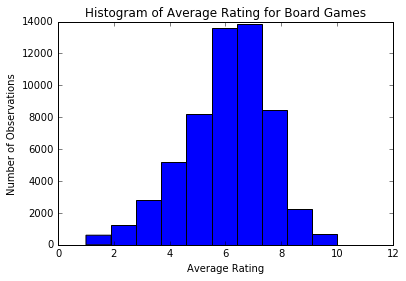

Mean: 6.016112849333849
Stdv: 1.5788299348332961


In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(board_games["average_rating"])
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Observations")
ax.set_title("Histogram of Average Rating for Board Games")
plt.show()

mean = board_games["average_rating"].mean()
std = board_games["average_rating"].std()
print("Mean: {0}".format(mean))
print("Stdv: {0}".format(std))

**Discussion:** The average rating values are continuous and appear to have a fairly normal distribution, meaning that a common error metric such as root mean square would work well. Large deviations on either side of the distribution would be heavily penalized.

**Part 3:** Plotting Clusters

In [13]:
from sklearn.cluster import KMeans
numeric_columns = board_games.iloc[:,3:]

kmeans = KMeans(n_clusters=5)
kmeans.fit(numeric_columns)
labels = kmeans.labels_

game_mean = numeric_columns.apply(lambda x: np.mean(x), axis=1)
game_std = numeric_columns.apply(lambda x: np.std(x), axis=1)

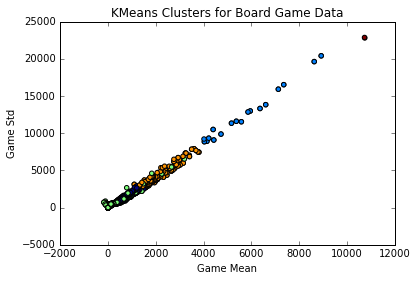

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(game_mean, game_std, c=labels)
ax.set_xlabel("Game Mean")
ax.set_ylabel("Game Std")
ax.set_title("KMeans Clusters for Board Game Data")
plt.show()

**Discussion:** The instructions for this part of the exercise were to plot the KMeans clusters on a scatterplot of row average vs row standard deviation. A row in the dataset contains a variety of different columns related to different measurements. The average of a row should be a meaningless value.

**Part 4:** Finding Correlations

In [16]:
correlations = numeric_columns.corr(method='pearson')
print(correlations['average_rating'])

# removed all columns with abs(r) values < 0.15
to_drop = ['bayes_average_rating','yearpublished','minplayers','maxplayers','playingtime','minplaytime','maxplaytime','users_rated','total_owners','total_traders','total_comments','total_weights']
numeric_columns.drop(to_drop,axis=1,inplace=True)

print("\n")
correlations = numeric_columns.corr(method='pearson')
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


minage            0.210049
average_rating    1.000000
total_wanters     0.196566
total_wishers     0.171375
average_weight    0.351081
Name: average_rating, dtype: float64


**Part 5:** Creating a Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
cols = ['minage','total_wanters','total_wishers','average_weight']
reg.fit(numeric_columns[cols],numeric_columns['average_rating'])
predictions = reg.predict(numeric_columns[cols])
mse = mean_squared_error(numeric_columns['average_rating'],predictions)
rmse = mse ** (1/2)
print('Root Mean Squared Error of Model')
print(rmse)

Root Mean Squared Error of Model
1.45611470726


Root Mean Squared Error Around Average Value (No Model)
1.57881605958


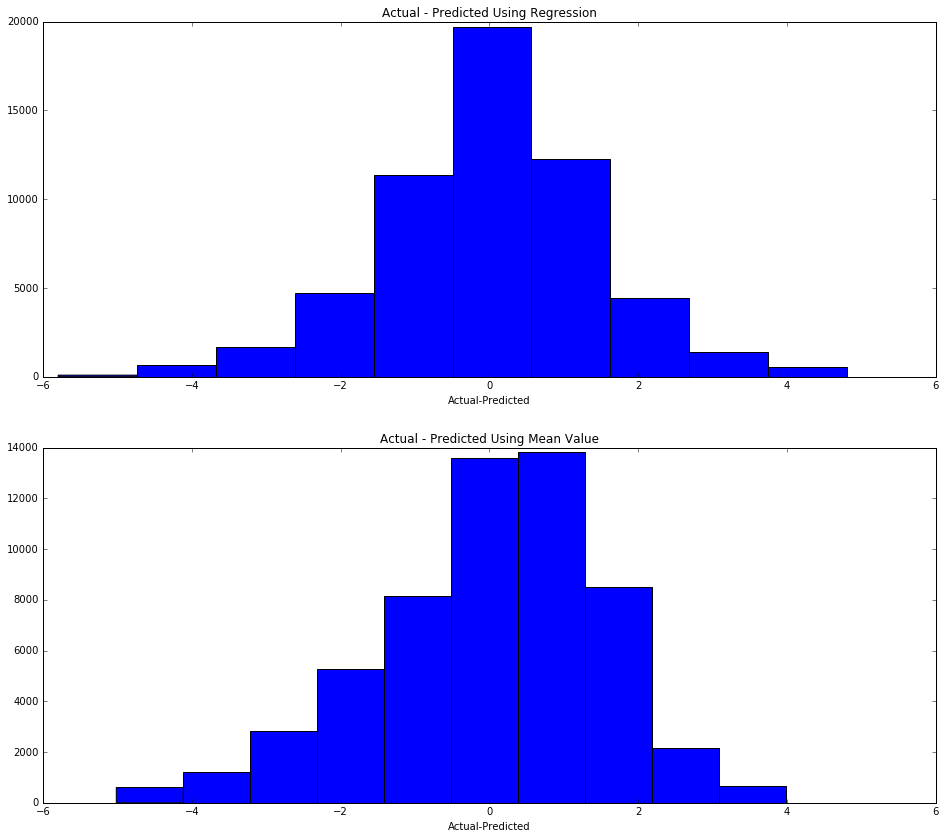

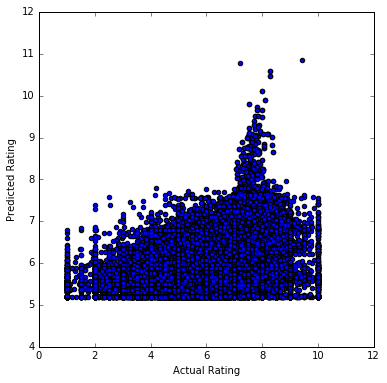

In [32]:
mean_rating = numeric_columns['average_rating'].mean()
act_minus_pred = numeric_columns['average_rating'] - predictions
act_minus_mean = numeric_columns['average_rating'] - mean_rating

mean_arr = [mean_rating for i in predictions]
mse_m = mean_squared_error(numeric_columns['average_rating'],mean_arr)
rmse_m = mse_m ** (1/2)
print('Root Mean Squared Error Around Average Value (No Model)')
print(rmse_m)

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.hist(act_minus_pred)
ax2.hist(act_minus_mean)
ax1.set_xlim([-6,6])
ax2.set_xlim([-6,6])
ax1.set_title("Actual - Predicted Using Regression")
ax1.set_xlabel("Actual-Predicted")
ax2.set_title("Actual - Predicted Using Mean Value")
ax2.set_xlabel("Actual-Predicted")
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(numeric_columns['average_rating'],predictions)
ax.set_xlabel("Actual Rating")
ax.set_ylabel("Predicted Rating")
plt.show()

**Discussion:** Applying a multivariate linear regression model to the board game data did not significantly improve the ability to predict the average rating. You can see in the histograms (and RMSE values) that the model only introduced a very slight improvement in predictive power over simply using the mean value. Given the weak correlations in the underlying data, that is not surprising.

**Part 6:** Next Steps

The next logical steps for this project would involve looking at the individual relationships further, checking for non-linear relationships, etc. For now, however, I'm going to park this project.